### Problem Statement (2) | Regression

Given California Houses prices data. This data contains information from the 1990 California census., it 
does provide an accessible introductory dataset the basics of regression models. 
The data pertains to the houses found in each California district and some summary stats about them 
based on the 1990 census data.


1. 70% training : 15% validation : 15% testing
2. apply linear, lasso(L1), ridge(L2) -> median house value
3. MSE, MAE
4. clean notebook

In [16]:
import pandas as pd

df = pd.read_csv("California_Houses.csv")
print(df.head())
print(df.columns)


Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')


In [17]:
X = df.drop('Median_House_Value', axis=1)
y = df['Median_House_Value']

# print(X)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (20640, 13), y shape: (20640,)


### 1. Linear Regression

- Using all given features + no scaling

In [20]:
from sklearn.model_selection import train_test_split

X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.1765, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 14447, Validation size: 3097, Test size: 3096


In [24]:
from sklearn.linear_model import LinearRegression

linear_reg_ = LinearRegression(normalize=True)
linear_reg_.fit(X_train, y_train)

y_pred_val = linear_reg_.predict(X_val)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 4603018887.774537
Mean Absolute Error (MAE): 49819.74071323281


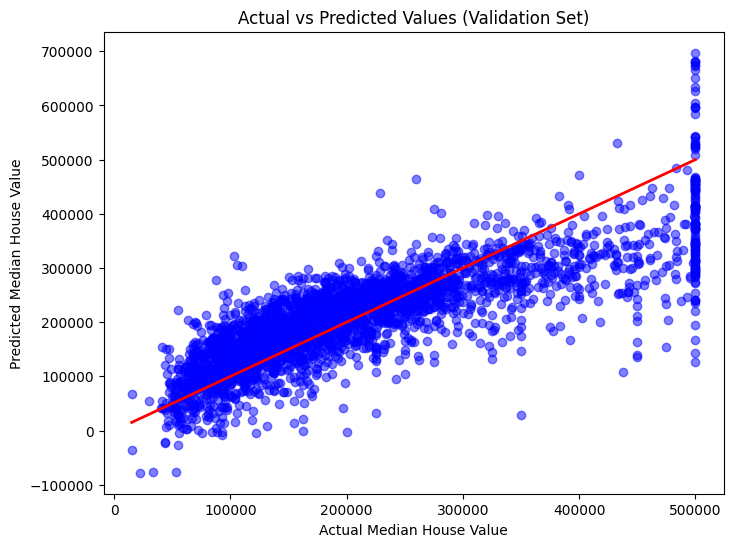

In [29]:
import matplotlib.pyplot as plt

# Predict on validation set
y_pred_val = linear_reg_.predict(X_val)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)  # 45-degree line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values (Validation Set)')
plt.show()


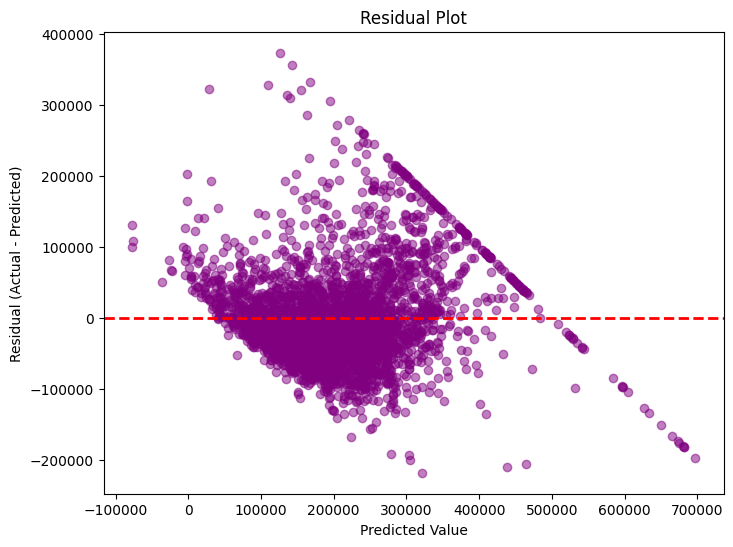

In [30]:
residuals = y_val - y_pred_val

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Value')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


Trying scaling data before(same output lol)

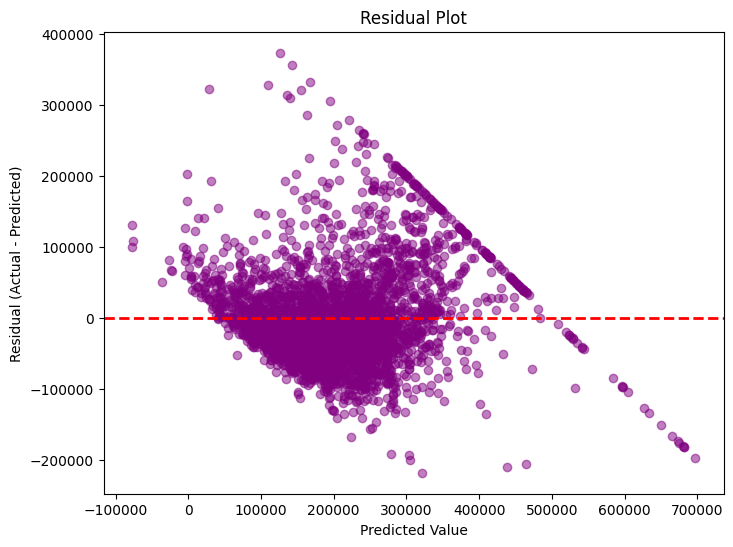

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(X_train, y_train)


y_val_predict = pipeline.predict(X_val)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Value')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


In [52]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example: Assuming df is your original DataFrame and you have already defined X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for easier visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the scaled data
print(X_scaled_df.head())


   Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  Households  \
0       2.344766    0.982143  -0.804819     -0.970706   -0.974429   -0.977033   
1       2.332238   -0.607019   2.045890      1.348649    0.861439    1.669961   
2       1.782699    1.856182  -0.535746     -0.825895   -0.820777   -0.843637   
3       0.932968    1.856182  -0.624215     -0.719067   -0.766028   -0.733781   
4      -0.012881    1.856182  -0.462404     -0.612239   -0.759847   -0.629157   

   Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
0  1.052548  -1.327835          -0.635876        1.158969   
1  1.043185  -1.322844          -0.616285        1.149889   
2  1.038503  -1.332827          -0.656307        1.151224   
3  1.038503  -1.337818          -0.666299        1.153580   
4  1.038503  -1.337818          -0.666299        1.153580   

   Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
0              1.165668            -1.297546                 -1.461074  


Trying Feature Engineering

- Removing some features based on calculated correlation

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64


In [90]:
X = df[['Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Households', 'Latitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego']]
y = df['Median_House_Value']

# print(X)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (20640, 9), y shape: (20640,)


In [91]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.1765, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 14447, Validation size: 3097, Test size: 3096


In [87]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_val = linear_reg.predict(X_val)


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 5003157840.861671
Mean Absolute Error (MAE): 52286.76352490734


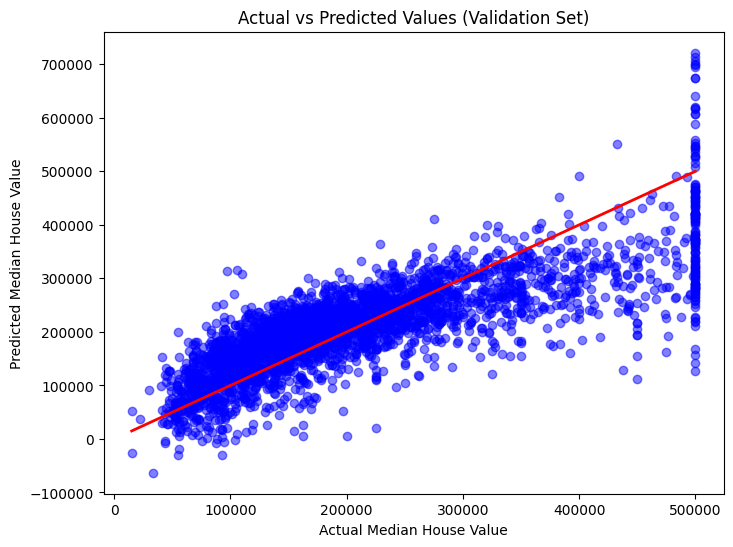

In [89]:
y_pred_val = linear_reg.predict(X_val)

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)  # 45-degree line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values (Validation Set)')
plt.show()

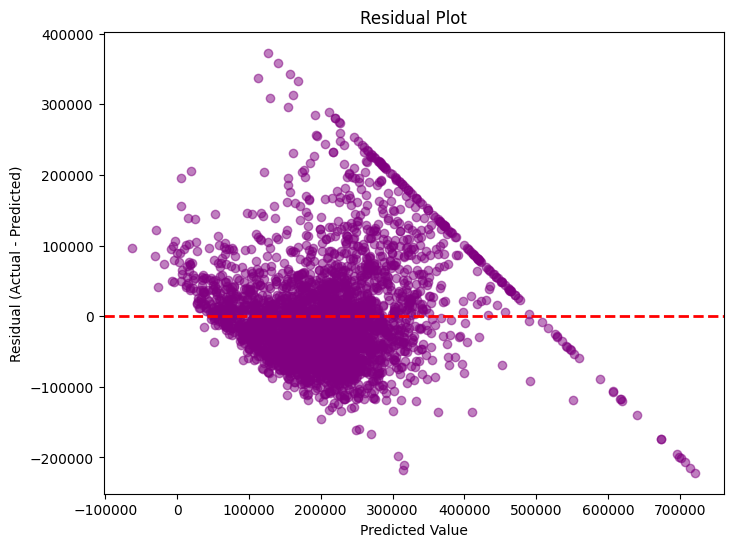

In [76]:
residuals = y_val - y_pred_val

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Value')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

Conclusion: SAME OUTPUT :) "WORSE ERROR"

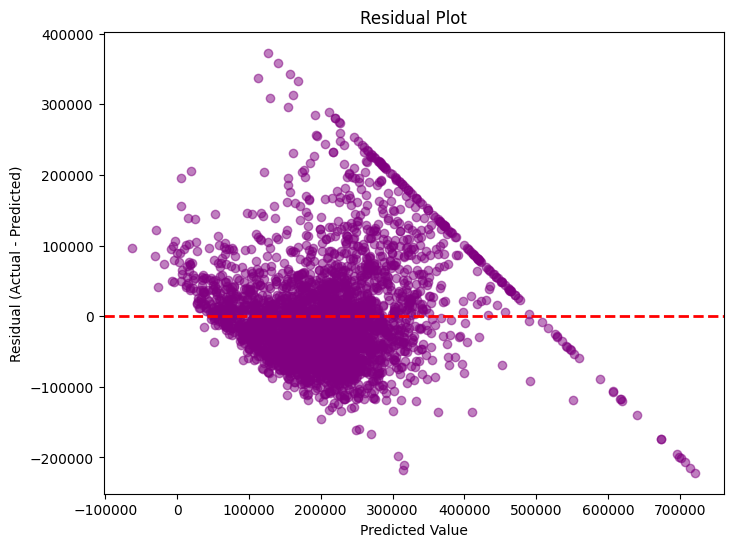

In [92]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())

pipeline.fit(X_train, y_train)


y_val_predict = pipeline.predict(X_val)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Value')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

In [101]:
from sklearn.linear_model import Lasso
lasso_model = Lasso() #see elkalam eltaht
lasso_model.fit(X_train, y_train)

y_pred_val_lasso = lasso_model.predict(X_val)


c:\Users\Menna Magdy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.687e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(


In [95]:
mse_lasso = mean_squared_error(y_val, y_pred_val_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_val_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, MAE: {mae_lasso}")


Lasso Regression - MSE: 5003172640.94708, MAE: 52286.868944724825


In [96]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred_val_ridge = ridge_model.predict(X_val)


In [97]:
mse_ridge = mean_squared_error(y_val, y_pred_val_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_val_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}")


Ridge Regression - MSE: 5003167450.183835, MAE: 52286.84596942918
